In [3]:
# Remove warnings
import warnings

warnings.filterwarnings('ignore')

# Data manipulation 
import pandas as pd
# Dates handling
from datetime import datetime, timedelta
# Chart modules
import matplotlib.pyplot as plt

# Linear algrebra
import numpy as np


# Technical indicators
from ta.trend import ema_indicator, trix, dpo
from ta.momentum import stochrsi
from ta.volatility import average_true_range
from modules.Utils.utils import loadFromDB, computeFutureLinearRegression, strategyTester
from modules.Utils.indicators import computeLaggingLinearRegression, computeTrixIndicator, addIndicators, computeRSI_VWAP, computeMASlope, computeSuperTrend



In [4]:
SYMBOL= 'BTC'
df = loadFromDB(f'../backtest_tools/database/database/KuCoin/1h/{SYMBOL}-USDT.csv')
df.head()

,Open,High,Low,Close,Volume,Timestamp
Date,,,,,,
2020-01-01 01:00:00,7196.2,7196.2,7176.1,7180.4,11.351644,1577836800
2020-01-01 02:00:00,7180.5,7225.1,7179.9,7213.7,19.023154,1577840400
2020-01-01 03:00:00,7213.8,7242.6,7213.5,7241.6,17.281015,1577844000
2020-01-01 04:00:00,7241.6,7243.2,7221.6,7225.4,15.088046,1577847600
2020-01-01 05:00:00,7225.4,7229.3,7218.6,7220.9,8.341240,1577851200


In [5]:
from modules.Utils.utils import loadFromDB, strategyTester
from modules.Utils.indicators import computeSuperTrend

df_day = loadFromDB(f'../backtest_tools/database/database/KuCoin/1d/{SYMBOL}-USDT.csv')
df_day = computeSuperTrend(df_day)
df_day.dropna(inplace=True)
df_day.tail()

,Open,High,Low,Close,Volume,Timestamp,ST_Direction
Date,,,,,,,
2022-08-24 02:00:00,21528.4,21894.6,21151.4,21366.7,7573.228464,1661299200,False
2022-08-25 02:00:00,21366.6,21815.1,21308.7,21557.5,5675.160154,1661385600,False
2022-08-26 02:00:00,21557.5,21874.9,20107.3,20239.8,13639.082723,1661472000,False
2022-08-27 02:00:00,20239.8,20380.2,19800.0,20033.7,6537.817204,1661558400,False
2022-08-28 02:00:00,20033.7,20172.3,19808.0,19938.9,4271.795310,1661644800,False


In [6]:
df['EMA1']=ema_indicator(close=df['Close'], window=7)
df['EMA2']=ema_indicator(close=df['Close'], window=30)
df['EMA3']=ema_indicator(close=df['Close'], window=50)
df['EMA4']=ema_indicator(close=df['Close'], window=100)
df['EMA5']=ema_indicator(close=df['Close'], window=121)
df['EMA6']=ema_indicator(close=df['Close'], window=200)

df['STOCH_RSI'] = stochrsi(close=df['Close'], window=14, smooth1=3, smooth2=3)
df = computeSuperTrend(df)
def addST(x):
    try:
        return df_day.loc[pd.to_datetime(x.name).date().strftime("%Y-%m-%d")].ST_Direction.values[0]
    except:
        return np.nan
    
df['ST_day'] = df.apply(addST,axis=1)
df.head()

,Open,High,Low,Close,Volume,Timestamp,EMA1,EMA2,EMA3,EMA4,EMA5,EMA6,STOCH_RSI,ST_Direction,ST_day
Date,,,,,,,,,,,,,,,
2020-01-01 01:00:00,7196.2,7196.2,7176.1,7180.4,11.351644,1577836800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
2020-01-01 02:00:00,7180.5,7225.1,7179.9,7213.7,19.023154,1577840400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
2020-01-01 03:00:00,7213.8,7242.6,7213.5,7241.6,17.281015,1577844000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
2020-01-01 04:00:00,7241.6,7243.2,7221.6,7225.4,15.088046,1577847600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
2020-01-01 05:00:00,7225.4,7229.3,7218.6,7220.9,8.341240,1577851200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True


Period : [2020-01-01 01:00:00] -> [2022-08-29 00:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 4945.37 $
Performance vs US Dollar : 394.54 %
Buy and Hold Performence : 177.08 %
Performance vs Buy and Hold : 122.81 %
Best trade : +78.95 %, the 2021-01-11 08:00:00
Worst trade : -8.69 %, the 2021-01-15 21:00:00
Worst drawBack : -30.0 %
Total fees :  345.32 $

----- Trades Informations -----
Total trades on period : 63
Number of positive trades : 24
Number of negative trades :  39
Trades win rate ratio : 38.1 %
Average trades performance : 3.56 %
Average positive trades : 14.63 %
Average negative trades : -3.26 %

----- Plot -----


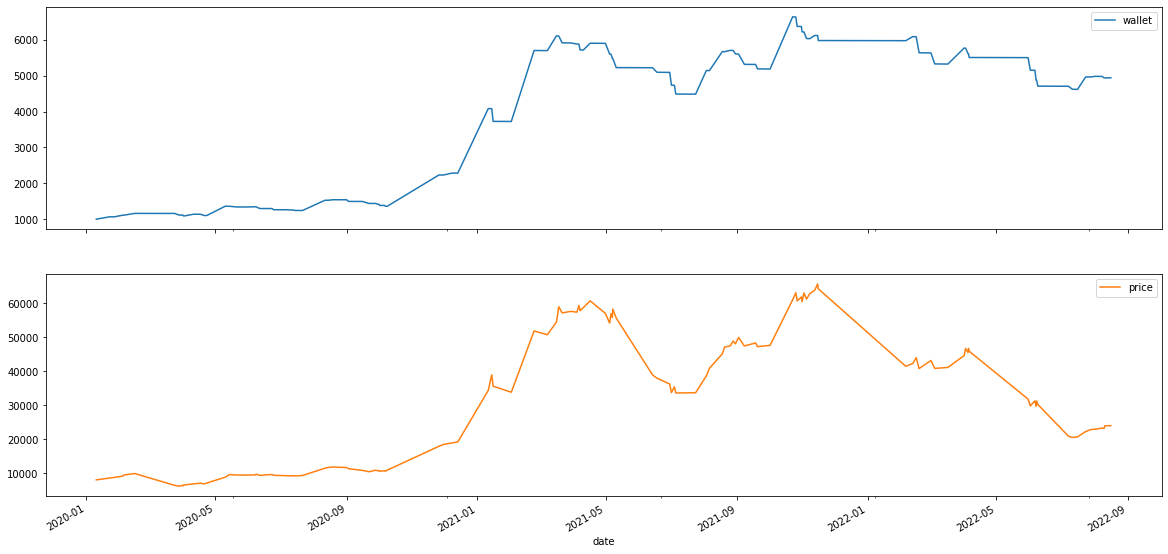

In [7]:
def buyCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if (row['EMA1'] > row['EMA2'] and
                    row['EMA2'] > row['EMA3'] and
                    row['EMA3'] > row['EMA4'] and
                    row['EMA4'] > row['EMA5'] and
                    row['EMA5']>row['EMA6'] and
                    row['ST_Direction']==True) else False

def sellCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if (row['EMA6'] > row['EMA1'] and
                    row['STOCH_RSI']>0.2) else False

strategyTester(df,buyCondition,sellCondition,equity=1000,)